In [1]:
from pandas import DataFrame
import matplotlib.pyplot as plt

In [9]:
d1 = DataFrame([5, 6, 3, 8, 10, 6, 8, 1, 5, 7, 3, 4, 9, 4, 3, 3, 5])
d1.count()[0]

17

In [4]:
# discrete probability distribution
s1 = d1[0].value_counts()
s1

3     4
5     3
8     2
6     2
4     2
10    1
9     1
7     1
1     1
Name: 0, dtype: int64

In [5]:
d2 = DataFrame(s1)
d2

,0
3,4
5,3
8,2
6,2
4,2
10,1
9,1
7,1
1,1


In [8]:
d2['p'] = d2[0] / d1.count()[0]
d2

,0,p
3,4,0.235294
5,3,0.176471
8,2,0.117647
6,2,0.117647
4,2,0.117647
10,1,0.058824
9,1,0.058824
7,1,0.058824
1,1,0.058824


In [10]:
del d2[0]
d2

,p
3,0.235294
5,0.176471
8,0.117647
6,0.117647
4,0.117647
10,0.058824
9,0.058824
7,0.058824
1,0.058824


In [12]:
d3 = d2.sort_index()
d3

,p
1,0.058824
3,0.235294
4,0.117647
5,0.176471
6,0.117647
7,0.058824
8,0.117647
9,0.058824
10,0.058824


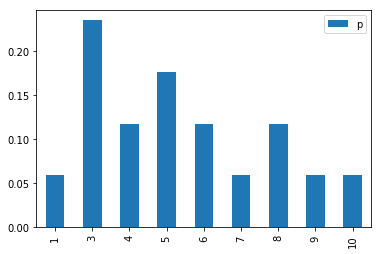

In [13]:
d3.plot(kind='bar')
plt.show()